In [1]:
#1 Import the necessary libraries.

import pandas as pd
import numpy as np
import datetime
import warnings
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
#2 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
#3 First look at its main features (head, shape, info).
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#4 Rename the columns so they follow the PE8 (snake case).

columns = []
for i in range (len(customer_df.columns)):
    columns.append(customer_df.columns[i].lower().replace(" ", "_"))
customer_df.columns = columns
customer_df.head()   

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
#5 Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
#6. Check NaN values per column. We could also check this using .info()

customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
#7 Define a function that differentiates between continuous and discrete variables.

def filter_variables(customer_df):
    categorical = customer_df.select_dtypes('object')
    num_discrete = customer_df.select_dtypes('int64')
    num_continous = customer_df.select_dtypes('float64')
    return categorical, num_continous, num_discrete

In [11]:
categorical, num_continous, num_discrete = filter_variables(customer_df)

In [12]:
num_continous.head()

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


In [13]:
num_discrete.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [14]:
#8 For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [15]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [16]:
categorical.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [17]:
def cat_cols():
    
    for column in categorical:
        if column != 'customer':
            cat_column = categorical[column]
            print(cat_column.value_counts())
            print('--')
            
cat_cols()


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
--
No     7826
Yes    1308
Name: response, dtype: int64
--
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
--
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
--
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
--
F    4658
M    4476
Name: gender, dtype: int64
--
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
--
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
--
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
--
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3   

We could remove 'Offer' from renew_offer_type.

In [18]:
#9 Get categorical features.
# I believe that all categorical columns aside from customer could be used for our model...no?

categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [19]:
#10 What should we do with the customer_id column?

customer_df = customer_df.set_index('customer')
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning categorical data lab

In [20]:
#1 Import the necessary libraries if you are starting a new notebook.
#2 Load the continuous and discrete variables into continuous_df and discrete_df variables.



In [21]:
discrete_df = num_discrete
discrete_df.head()

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1


In [22]:
continuous_df = num_continous
continuous_df.head()

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879


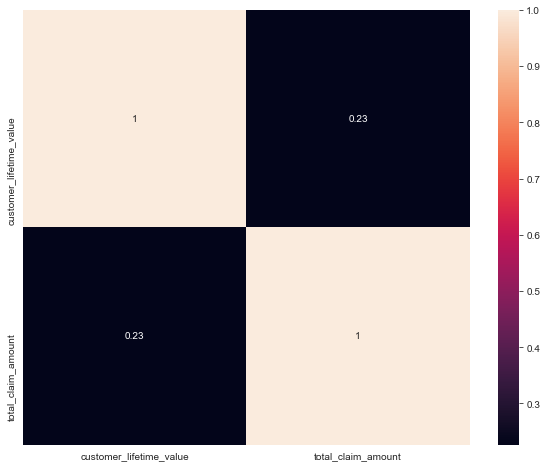

In [23]:
#3 Plot a correlation matrix, what can you see?
# There is little correlation between the variables in either the discrete or continuous data. 

corr_matrix=continuous_df.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

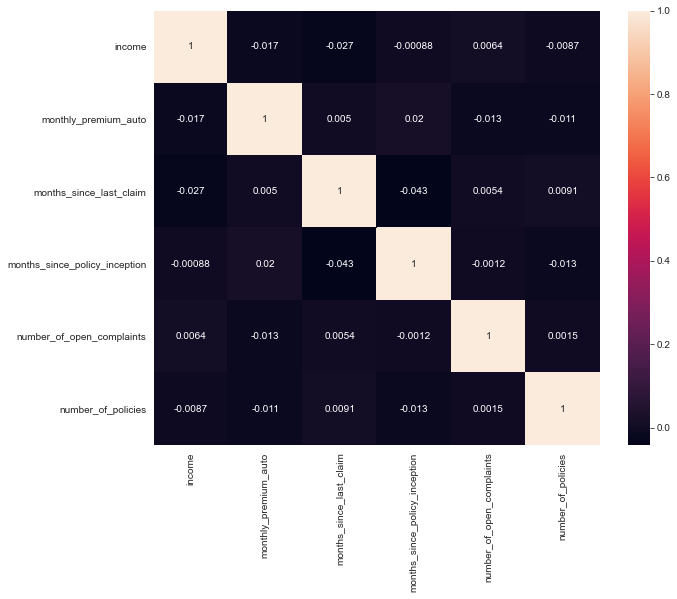

In [24]:
corr_matrix=num_discrete.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

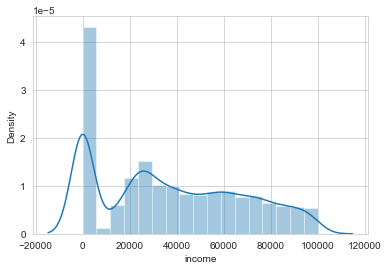

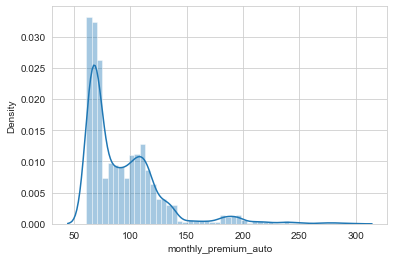

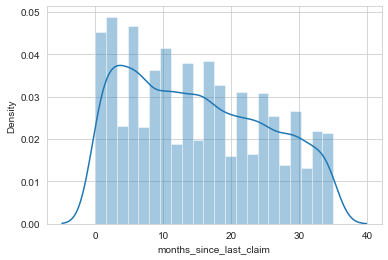

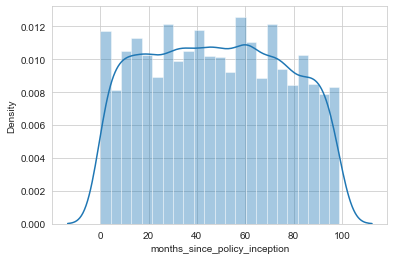

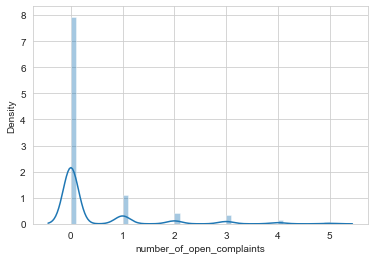

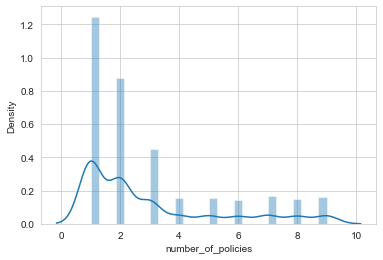

In [25]:
#4 Create a function to plot every discrete variables. Do the same with continuous variables
#(be careful, you may change the plot type to another one better suited for continuous data).

def discrete_plot(data):
    for col in data:
        sns.distplot(data[col])
        plt.show()

discrete_plot(discrete_df)



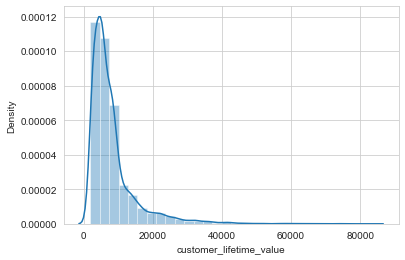

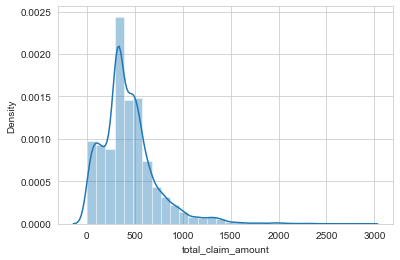

In [26]:
def continuous_plot(data):
    for col in data:
        sns.distplot(data[col], bins = 30)
        plt.show()

continuous_plot(continuous_df)

#5 What can you see in the plots?

3 take aways:
    
1) continous data has lots of outliers (tca starts at 1500 and clv starts at 40000)
2) lots incomes in the first bucket.... probbaly lots of 0's
2) months since lat policy inception has no real pattern... this may be droppable? 

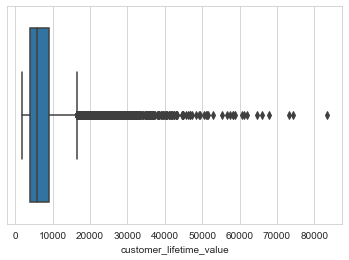

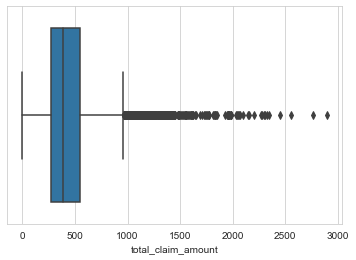

In [27]:
#6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

for col in continuous_df:
    sns.boxplot (continuous_df[col])
    plt.show()

In [ ]:
#Have you found outliers? If you have, what should we do with them?
# since the outliers are quite high, I will arbitrarily drop the top 5% of the data and revisit my boxplot to see if it is more acceptable. 

In [28]:
outlier_clv = continuous_df['customer_lifetime_value'].quantile(0.95)

In [29]:
continuous_df[continuous_df['customer_lifetime_value']>outlier_clv]

,customer_lifetime_value,total_claim_amount
8,24127.50402,511.200000
22,24127.50402,511.200000
50,36707.42639,593.830288
51,33473.34946,508.800000
63,24261.01777,104.331355
...,...,...
9062,30205.01297,469.359715
9097,30104.51969,848.737364
9110,34611.37896,523.200000
9122,25464.82059,465.600000


In [30]:
continuous_df.shape

(9134, 2)

In [31]:
continuous_df = continuous_df[continuous_df['customer_lifetime_value']<outlier_clv]

In [32]:
continuous_df.shape

(8677, 2)

In [33]:
outlier_tca = continuous_df['total_claim_amount'].quantile(0.95)

In [34]:
continuous_df[continuous_df['total_claim_amount']>outlier_tca]

,customer_lifetime_value,total_claim_amount
1,6979.535903,1131.464935
73,6781.270203,982.399613
135,4022.963529,975.107098
142,9047.119209,1087.995426
181,16936.271470,1122.658899
...,...,...
9103,15245.254950,1329.957905
9106,6827.044423,956.689634
9107,5619.689084,1027.000029
9109,3622.872124,1254.177129


In [35]:
continuous_df = continuous_df[continuous_df['total_claim_amount']<outlier_tca]

In [36]:
continuous_df.shape

(8243, 2)

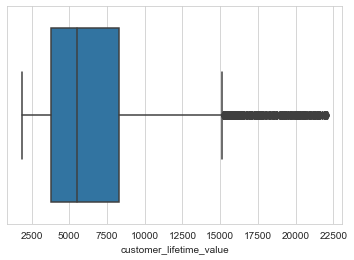

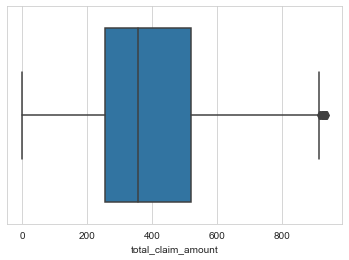

In [37]:
for col in continuous_df:
    sns.boxplot (continuous_df[col])
    plt.show()

In [ ]:
# this works for me.
#I feel like the rest of the questions were already answered in lab 1 so I will stop here. 